In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Merge two dataframes using an outer join
merge_table = pd.merge(city_data, ride_data, on="city", how="outer")

# Display the data table for preview
merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

In [18]:
#Total Number of Rides Per City (?)
x_axis = merge_table.groupby("city")["fare"].nunique()
x_axis.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: fare, dtype: int64

In [3]:
#Average Fare
CityType = merge_table.groupby("type")
CityType.count()

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [5]:
CityY = CityType["fare"].mean()
CityY

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [67]:
#Total Number of drivers per city
drivercity = merge_table.groupby("city")["driver_count"].unique()
drivercity.head()


city
Amandaburgh      [12]
Barajasview      [26]
Barronchester    [11]
Bethanyland      [22]
Bradshawfurt      [7]
Name: driver_count, dtype: object

In [7]:
# Build the scatter plots for each city types


In [8]:
# Incorporate the other graph properties


In [9]:
# Create a legend
#plt.legend(handles=[Urban, Suburban, Rural], loc="best")

In [10]:
# Incorporate a text label regarding circle size


In [11]:
# Save Figure
#plt.savefig("../data/ridesharebubble.png")


In [12]:
# Show plot
plt.show()

## Total Fares by City Type

In [20]:
# Calculate Type Percents
TotalFares = CityType["fare"].sum()
TotalFares





type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
CityRides = merge_table["fare"].sum()
CityRides

63538.64

In [22]:
#Percent of Fares by Type
RuralFares = (TotalFares["Rural"] / CityRides)*100
RuralFares

6.811492974983412

In [23]:
SuburbanFares = (TotalFares["Suburban"] / CityRides)*100
SuburbanFares

30.46387206273221

In [24]:
UrbanFares = (TotalFares["Urban"] / CityRides)*100
UrbanFares

62.72463496228436

In [25]:
summary_tablefares = pd.DataFrame({"Percentage of Fares": [RuralFares, SuburbanFares, UrbanFares]})
summary_tablefares = summary_tablefares[summary_tablefares.columns[0]]
summary_tablefares

0     6.811493
1    30.463872
2    62.724635
Name: Percentage of Fares, dtype: float64

(-1.116703108059631,
 1.197266450606346,
 -1.1123788383456472,
 1.1610996829807194)

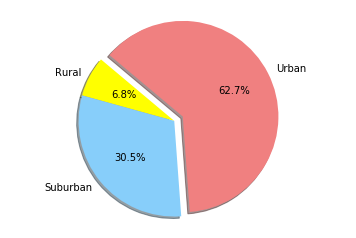

In [26]:
# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1,)
plt.pie(summary_tablefares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,  startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [20]:
# Save Figure
#plt.savefig("../data/ridesharefare.png")

In [21]:
# Show Figure
plt.show()

In [22]:
#LEAVE THIS AS EXAMPLE

## Total Rides by City Type

In [27]:
# Calculate Ride Percents
RidesbyCity = merge_table.groupby("type")["city"].value_counts()
RidesbyCity


type      city               
Rural     Michaelberg            12
          Lake Latoyabury        11
          Bradshawfurt           10
          North Holly             9
          West Heather            9
          North Jaime             8
          South Marychester       8
          South Jennifer          7
          Harringtonfort          6
          Jessicaport             6
          Lake Jamie              6
          New Ryantown            6
          Taylorhaven             6
          Penaborough             5
          Randallchester          5
          Newtonview              4
          South Saramouth         4
          Garzaport               3
Suburban  East Marymouth         27
          Josephside             27
          Lake Robertside        25
          South Brenda           24
          Colemanland            22
          New Raymond            22
          South Teresa           22
          West Hannah            21
          West Kimmouth          2

In [28]:
TotalRides = RidesbyCity.sum()
TotalRides

2375

In [29]:
RuralRides = (RidesbyCity["Rural"] / TotalRides)*100
RuralRides.head()

city
Michaelberg        0.505263
Lake Latoyabury    0.463158
Bradshawfurt       0.421053
North Holly        0.378947
West Heather       0.378947
Name: city, dtype: float64

In [31]:
SuburbanRides = (RidesbyCity["Suburban"] / TotalRides)*100
SuburbanRides.head()

city
East Marymouth     1.136842
Josephside         1.136842
Lake Robertside    1.052632
South Brenda       1.010526
Colemanland        0.926316
Name: city, dtype: float64

In [32]:
UrbanRides = (RidesbyCity["Urban"] / TotalRides)*100
UrbanRides.head()

city
West Angela        1.642105
South Karenland    1.600000
North Jason        1.473684
Liumouth           1.389474
Port Frank         1.389474
Name: city, dtype: float64

In [33]:
TotRuralRides = RuralRides.sum()
TotRuralRides

5.263157894736842

In [34]:
TotSuburbanRides = SuburbanRides.sum()
TotSuburbanRides

26.315789473684212

In [35]:
TotUrbanRides = UrbanRides.sum()
TotUrbanRides

68.42105263157895

In [36]:
summary_tablerides = pd.DataFrame({"Percentage of Rides by City Type": [TotRuralRides, TotSuburbanRides, TotUrbanRides]})
summary_tablerides = summary_tablerides[summary_tablerides.columns[0]]
summary_tablerides

0     5.263158
1    26.315789
2    68.421053
Name: Percentage of Rides by City Type, dtype: float64

(-1.1110420108142822,
 1.215408844786391,
 -1.085782351148256,
 1.1462471637001541)

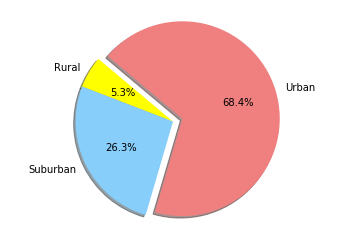

In [37]:
# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(summary_tablerides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")


In [33]:
# Save Figure
#plt.savefig("../data/ridesharetotrides.png")

In [34]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [68]:
# Calculate Driver Percents
DriversbyType = city_data["driver_count"]
DriversbyType

#Alex said this answer was better since it removed duplicates

0      38
1      59
2      67
3      34
4      39
5      70
6      48
7      25
8      22
9      26
10     12
11     39
12     17
13     32
14     27
15     67
16      7
17     33
18     52
19     25
20     64
21     23
22     21
23     23
24     10
25     73
26     61
27     25
28     19
29     46
       ..
90     11
91     10
92     22
93      5
94     14
95      4
96     25
97     23
98     19
99      7
100     1
101    11
102     7
103     4
104     1
105     8
106     6
107     1
108     6
109     4
110     4
111     2
112     1
113     1
114     7
115     7
116     2
117     9
118     1
119     7
Name: driver_count, Length: 120, dtype: int64

In [4]:
TotalDrivers = DriversbyType.sum()
TotalDrivers

70

In [5]:
RuralDrivers = (DriversbyType["Rural"] /TotalDrivers)*100
RuralDrivers

10.0

In [6]:
SuburbanDrivers = (DriversbyType["Suburban"] /TotalDrivers)*100
SuburbanDrivers

25.71428571428571

In [7]:
UrbanDrivers = (DriversbyType["Urban"] /TotalDrivers)*100
UrbanDrivers

64.28571428571429

In [11]:
# Build Pie Charts
summary_tabledrivers = pd.DataFrame({"Percentage of Drivers by City Type": [RuralDrivers, SuburbanDrivers, UrbanDrivers]})
summary_tabledrivers = summary_tabledrivers[summary_tabledrivers.columns[0]]
summary_tabledrivers

0    10.000000
1    25.714286
2    64.285714
Name: Percentage of Drivers by City Type, dtype: float64

(-1.1124154412809915,
 1.2069916649936634,
 -1.1024171061450565,
 1.1575972727122696)

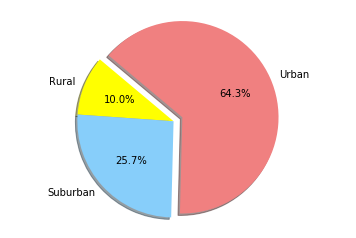

In [38]:
# Build Pie Chart
# SAME AS ABOVE, SO PAY ATTENTION TO ERRORS
# Tell matplotlib to create a pie chart based upon the above data
labels = ["Rural", "Suburban", "Urban"]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(summary_tabledrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [39]:
# Save Figure
#plt.savefig("../data/ridesharetotdrive.png")

In [40]:
# Show Figure
plt.show()